In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  LSTM, Reshape,  TimeDistributed
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
!pip install opendatasets

In [6]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/dhruvsaluja/indian-medicinal-plants")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhruvsaluja
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dhruvsaluja/indian-medicinal-plants


100%|██████████| 253M/253M [00:01<00:00, 156MB/s]


In [7]:
# Define parameters
input_shape = (150, 150, 3)  # Adjust the image size as needed
batch_size = 32
epochs = 20
num_classes = 40  # Number of different plant classes
data_dir = "/content/indian-medicinal-plants/Indian Medicinal Plant Image Datasets/Medicinal plant dataset"  # Replace with the path to your dataset folder


In [8]:
# Create a mapping between class indices and plant names
class_mapping = {
    0: 'Aloevera',
    1: 'Amla',
    2: 'Amruta Balli',
    3: 'Arali',
    4: 'Ashoka',
    5: 'Ashwagandha',
    6: 'Avacado',
    7: 'Bamboo',
    8: 'Basale',
    9: 'Betel',
    10: 'Betel_Nut',
    11: 'Brahmi',
    12: 'Castor',
    13: 'Curry Leaf',
    14: 'Doddapatre',
    15: 'Ekka',
    16: 'Ganike',
    17: 'Gauva',
    18: 'Geranium',
    19: 'Henna',
    20: 'Hibiscus',
    21: 'Honge',
    22: 'Insulin',
    23: 'Jasmine',
    24: 'Lemon',
    25: 'Lemon_grass',
    26: 'Mango',
    27: 'Mint',
    28: 'Nagadali',
    29: 'Neem',
    30: 'Nithyapushpa',
    31: 'Nooni',
    32: 'Pappaya',
    33: 'Pepper',
    34: 'Pomegranate',
    35: 'Raktachandini',
    36: 'Rose',
    37: 'Sapota',
    38: 'Tulasi',
    39: 'Wood_sorel',
    # Add mappings for all 40 classes here
}

In [9]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,     # Normalize pixel values
    rotation_range=20,      # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,        # Shear intensity
    zoom_range=0.2,         # Randomly zoom in on images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest',    # Fill missing pixels with the nearest value
    validation_split=0.2     # 20% of data will be used for validation
)

In [10]:
# Load and augment training data (80%)
train_generator = datagen.flow_from_directory(
    data_dir,                 # Root directory containing 40 subfolders
    target_size=input_shape[:2],   # Resize images to match input_shape
    batch_size=batch_size,
    class_mode='categorical',  # Categorical classification
    shuffle=True,             # Shuffle the data for training
    subset='training'         # Specify training data subset
)

Found 4765 images belonging to 40 classes.


In [11]:
# Load and augment validation data (20%)
validation_generator = datagen.flow_from_directory(
    data_dir,                 # Root directory containing 40 subfolders
    target_size=input_shape[:2],  # Resize images to match input_shape
    batch_size=batch_size,
    class_mode='categorical',  # Categorical classification
    shuffle=False,            # Do not shuffle for validation
    subset='validation'       # Specify validation data subset
)


Found 1180 images belonging to 40 classes.


In [12]:
# Build the neural network model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model with validation data
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,  # Use validation data
)

Epoch 1/20
149/149 [==============================] - 57s 343ms/step - loss: 3.4858 - accuracy: 0.0722 - val_loss: 3.1608 - val_accuracy: 0.1381
Epoch 2/20
149/149 [==============================] - 43s 292ms/step - loss: 2.9073 - accuracy: 0.1964 - val_loss: 2.6821 - val_accuracy: 0.2305
Epoch 3/20
149/149 [==============================] - 45s 304ms/step - loss: 2.5248 - accuracy: 0.2701 - val_loss: 2.3352 - val_accuracy: 0.3237
Epoch 4/20
149/149 [==============================] - 44s 295ms/step - loss: 2.1747 - accuracy: 0.3589 - val_loss: 2.0356 - val_accuracy: 0.3737
Epoch 5/20
149/149 [==============================] - 44s 295ms/step - loss: 1.9189 - accuracy: 0.4292 - val_loss: 1.7007 - val_accuracy: 0.4822
Epoch 6/20
149/149 [==============================] - 44s 296ms/step - loss: 1.7480 - accuracy: 0.4774 - val_loss: 1.6610 - val_accuracy: 0.4856
Epoch 7/20
149/149 [==============================] - 43s 292ms/step - loss: 1.5549 - accuracy: 0.5247 - val_loss: 1.4802 - val_ac

In [15]:
# Function to plot metrics
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

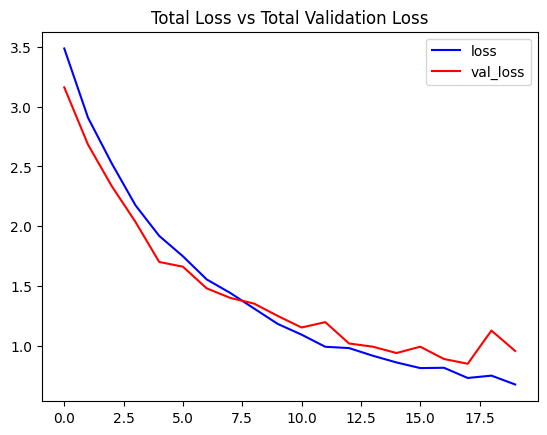

In [16]:
# Plot metrics
plot_metric(history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')
plt.show()

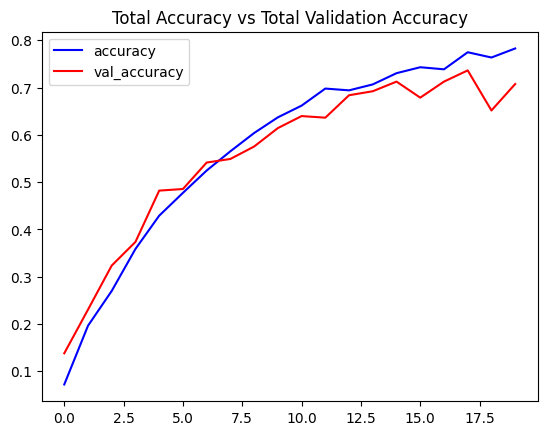

In [17]:
plot_metric(history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')
plt.show()

In [ ]:
# Save the trained model
model.save('plant_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model for inference
loaded_model = keras.models.load_model('plant_classification_model.h5')


In [ ]:
# Evaluate the model on validation data
validation_results = model.evaluate(validation_generator)

# Print the evaluation metrics
print("Validation Loss:", validation_results[0])
print("Validation Accuracy:", validation_results[1])

# Predictions on validation data for confusion matrix
validation_generator.reset()
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_true, y_pred_labels)
precision = precision_score(y_true, y_pred_labels, average='weighted')
recall = recall_score(y_true, y_pred_labels, average='weighted')
f1 = f1_score(y_true, y_pred_labels, average='weighted')

conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Print additional evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display classification report and confusion matrix
class_names = list(class_mapping.values())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_names))

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

37/37 [==============================] - 10s 266ms/step - loss: 0.9793 - accuracy: 0.6924
Validation Loss: 0.9792717099189758
Validation Accuracy: 0.6923728585243225
37/37 [==============================] - 9s 242ms/step
Accuracy: 0.6957627118644067
Precision: 0.7193784513125475
Recall: 0.6957627118644067
F1 Score: 0.6907607904551133

Classification Report:
               precision    recall  f1-score   support

     Aloevera       0.67      0.75      0.71        32
         Amla       0.66      0.86      0.75        29
 Amruta Balli       0.52      0.55      0.53        29
        Arali       0.96      0.83      0.89        29
       Ashoka       0.75      0.93      0.83        29
  Ashwagandha       0.81      0.76      0.79        29
      Avacado       0.96      0.76      0.85        29
       Bamboo       0.90      0.97      0.93        29
       Basale       0.71      0.52      0.60        29
        Betel       0.68      0.87      0.76        30
    Betel_Nut       0.79      0.76

In [ ]:
# Example code for prediction on a new image
def predict_plant(image_path):
    img = image.load_img(image_path, target_size=input_shape[:2])
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0

    prediction = loaded_model.predict(img)
    class_index = np.argmax(prediction)
    plant_name = class_mapping.get(class_index, 'Unknown Plant')
    confidence = np.max(prediction)

    return plant_name, confidence

In [ ]:
# Example usage:
image_path = '/content/hibiscus.jpg'
predicted_plant, confidence = predict_plant(image_path)
print(f"Predicted plant: {predicted_plant}")
print(f"Confidence level: {confidence * 100:.2f}%")

1/1 [==============================] - 0s 31ms/step
Predicted plant: Hibiscus
Confidence level: 99.97%
